In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from pandas import read_excel, DataFrame
import pandas as pd
import cv2
import numpy as np
import scipy
import pickle
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def crop(Image, offsetHauteur, offsetLargeur):
    hauteur = Image.shape[0]
    largeur = Image.shape[1]
    croped_image = Image[(hauteur//2 -offsetHauteur):(hauteur//2 +offsetHauteur),(largeur//2 -offsetLargeur):(largeur//2 +offsetLargeur)]
    return croped_image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your data into a DataFrame.
df_train = pd.read_excel('./kawkaw_trainData.xlsx')
df_test = pd.read_excel('./kawkaw_testData.xlsx')

# Set up the ImageDataGenerator.
datagen = ImageDataGenerator(rescale=1./255)

# Set up the data generator for training data.
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='./train_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw'
)

# Set up the data generator for test data.
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='./test_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw'
)

Found 4320 validated image filenames.
Found 2142 validated image filenames.


In [4]:
tf.keras.backend.clear_session()

In [6]:
def create_cnn(width=400, height=400, depth=3):
    model = keras.models.Sequential()
    input_shape = (width, height, depth)
    X_i = tf.keras.layers.Input(shape=input_shape)

    X1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same") (X_i)
    X1 = tf.keras.layers.BatchNormalization(axis = 3)(X1)
    X1 = tf.keras.layers.Activation('relu')(X1)

    X2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same") (X1)
    X2 = tf.keras.layers.BatchNormalization(axis = 3)(X2)
    X2 = tf.keras.layers.Activation('relu')(X2)

    X3 = tf.keras.layers.Add()([X1,X2])

    X4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (X3)

    X5 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same") (X4)
    X5 = tf.keras.layers.BatchNormalization(axis = 3)(X5)
    X5 = tf.keras.layers.Activation('relu')(X5)

    X6 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same") (X5)
    X6 = tf.keras.layers.BatchNormalization(axis = 3)(X6)
    X6 = tf.keras.layers.Activation('relu')(X6)

    X7 = tf.keras.layers.Add()([X5,X6])

    X8 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (X7)

    X9 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same") (X8)
    X9 = tf.keras.layers.BatchNormalization(axis = 3)(X9)
    X9 = tf.keras.layers.Activation('relu')(X9)

    X10 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same") (X9)
    X10 = tf.keras.layers.BatchNormalization(axis = 3)(X9)
    X10 = tf.keras.layers.Activation('relu')(X9)

    X10 = tf.keras.layers.Add()([X9,X10])

    X11 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (X10)


    X12 = tf.keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same") (X11)
    X12 = tf.keras.layers.BatchNormalization(axis = 3)(X12)
    X12 = tf.keras.layers.Activation('relu')(X12)

    X13 = tf.keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same") (X12)
    X13 = tf.keras.layers.BatchNormalization(axis = 3)(X13)
    X13 = tf.keras.layers.Activation('relu')(X13)

    X14 = tf.keras.layers.Add()([X12,X13])

    X15 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (X14)

    X16 = tf.keras.layers.Conv2D(4, kernel_size=(3, 3), activation="relu", padding="same") (X15)
    X16 = tf.keras.layers.BatchNormalization(axis = 3)(X16)
    X16 = tf.keras.layers.Activation('relu')(X16)

    X17 = tf.keras.layers.Conv2D(4, kernel_size=(3, 3), activation="relu", padding="same") (X16)
    X17 = tf.keras.layers.BatchNormalization(axis = 3)(X17)
    X17 = tf.keras.layers.Activation('relu')(X17)
    
    X18 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (X17)


    Xf = tf.keras.layers.Flatten() (X18)

    Xf = tf.keras.layers.Dense(4, activation="relu") (Xf)
    
    model = tf.keras.models.Model(inputs = X_i, outputs = Xf, name='Feature_Extraction')
    
    return model

def save_model(model):
    # filename = './CnnResudZn.h5'
    filename = './CnnResudZnepochs50.h5'
    model.save(filename)
    print("Model is saved into : "+filename)
        
def loading_model():
    filename = './CnnResudZnepochs50.h5'
    return load_model(filename)

In [7]:
model = create_cnn(width=400, height=400, depth=3)

In [8]:
print(model.summary())

Model: "Feature_Extraction"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 400, 400, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 400, 400, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                

In [9]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_percentage_error', metrics=["accuracy"])

# hyperparameters
epochs = 50

In [10]:
# training
hist = model.fit(train_generator, validation_data=test_generator, epochs=epochs)

#hist = model.fit(train_generator, validation_data=test_generator)
# evaulate
#model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

Epoch 1/50
135/135 [==============================] - 3186s 23s/step - loss: 68.3567 - accuracy: 0.4410 - val_loss: 99.1205 - val_accuracy: 0.6060
Epoch 2/50
 87/135 [==================>...........] - ETA: 14:57 - loss: 44.7913 - accuracy: 0.4508

KeyboardInterrupt: 

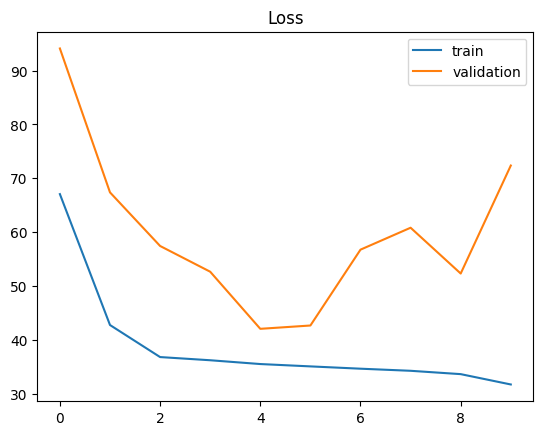

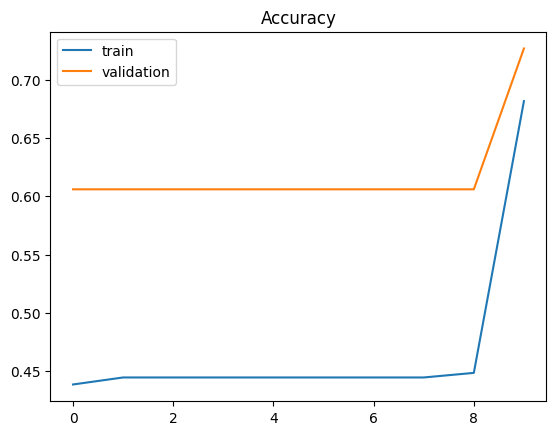

In [28]:

pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [29]:
save_model(model)

Model is saved into : ./CnnResudZn.h5


In [30]:
result = model.evaluate(test_generator)

67/67 [==============================] - 111s 2s/step - loss: 72.3603 - accuracy: 0.7269


In [31]:
# Évaluer le modèle sur les données de test
evaluation = model.evaluate(test_generator)

# Afficher les métriques d'évaluation
print("Perte (Loss):", evaluation[0])
print("Métrique 1:", evaluation[1])
# print("Métrique 2:", evaluation[2])
# ...


67/67 [==============================] - 123s 2s/step - loss: 72.3603 - accuracy: 0.7269
Perte (Loss): 72.36031341552734
Métrique 1: 0.7268907427787781


Deployement code recent

In [90]:
Model = load_model('./CnnResudZnepochs50.h5')
pathVideo = "E:/data/rl1_zn20_6_23.avi"

In [91]:

# Video = cv2.VideoCapture(pathIn)
# vid= pathIn.split("/")[2].split(".")[0]

def deploiement (pathVideo, Model):

    Teneur_predit = []
    Fe = []
    Cu = []
    Pb = []
    Zn = []
    count = 0

    Video = cv2.VideoCapture(pathVideo)
  
    while(Video.isOpened()):
        
        Video.set(cv2.CAP_PROP_POS_MSEC,(count*500))    # added this line 
        
        success, frame = Video.read()
        if success == False:
            break
 
        image = crop(frame,200,200)
      
            
        #prediction
            
        resized = cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
        resized = resized/255.0
        resized = np.array(resized)
        resized = resized.reshape((1,200,200,3))
        #predict
        t = Model.predict(resized)
        
        #print(t)
        
        Teneur_predit.append(t)
        

        
        
    
        count=count+1
            
    # Calcul moyenne teneurs predites
 
    #Moyenne_teneur_predit_Pb = cal_quartil(Pb)
    #Moyenne_teneur_predit_Zn = cal_quartil(Zn)
    #Moyenne_teneur_predit_Cu = cal_quartil(Cu)
    #Moyenne_teneur_predit_Fe = cal_quartil(Fe)
    
    return Teneur_predit


def cal_quartil(data):
    data = DataFrame(data)
    #find absolute value of z-score for each observation
    z = np.abs(stats.zscore(data))
    #only keep rows in dataframe with all z-scores less than absolute value of 3 
    data_clean = data[(z<3).all(axis=1)]
    #find how many rows are left in the dataframe 
   
    #find Q1, Q3, and interquartile range for each column
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = data.apply(stats.iqr)
    #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
    df = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
    #find how many rows are left in the dataframe
    data_clean = np.average(df)
    
    return data_clean

def CalculMoyenneTenneursPredites(TabTenneursPredites):
    Fe = []
    Cu = []
    Pb = []
    Zn = []
    i = 0
    for i in range(0,len(TabTenneursPredites)):
        Cu.append(TabTenneursPredites[i][0][0])
        Fe.append(TabTenneursPredites[i][0][1])
        Pb.append(TabTenneursPredites[i][0][2])
        Zn.append(TabTenneursPredites[i][0][3])
        
        
    Moyenne_teneur_predit_Pb = cal_quartil(Pb)
    Moyenne_teneur_predit_Zn = cal_quartil(Zn)
    Moyenne_teneur_predit_Cu = cal_quartil(Cu)
    Moyenne_teneur_predit_Fe = cal_quartil(Fe)
        
    return Moyenne_teneur_predit_Cu, Moyenne_teneur_predit_Fe, Moyenne_teneur_predit_Pb, Moyenne_teneur_predit_Zn


def TenneurReel(Video, FileName):
    df = read_excel(FileName)
    for i in range(0, df.shape[0]):
        if Video == df['Name'].values[i]:
            CuReel = df['Cu %'].values[i]
            FeReel = df['Fe %'].values[i]
            PbReel = df['Pb %'].values[i]
            ZnReel = df['Zn %'].values[i]
            
    return CuReel, FeReel, PbReel, ZnReel

# Element must be: Cu Pb Zn Fe
def PlotTenneurs(TeneurPredit, TeneurReel, Moyenne , Element):
    
    
    Ordre = {'Cu': 0 , 'Fe': 1, 'Pb': 2 , 'Zn':3 }
    
    TeneurPreditList = []
    plt.figure(figsize=(15,10))
    plt.title('Real Labels Vs Predicted Labels (' + Element+')')
    plt.ylabel(Element + '% Value')
    plt.xlabel('Image ID')


    for i in range (0, len(TeneurPredit)):
        TeneurPreditList.append(Teneur_predit[i][0][Ordre[Element]])
                
    y=TeneurPreditList
    x=TeneurReel[Ordre[Element]]
    Avg_normale = np.average(TeneurPreditList)
    QuartMoyenne = Moyenne[Ordre[Element]]
        
    plt.plot(y, 'ro-')

    plt.axhline(y = x, color = 'b', linestyle = '--')
    plt.axhline(y = QuartMoyenne, color = 'y', linestyle = '--')
    plt.axhline(y = Avg_normale, color = 'g', linestyle = '--')

    plt.legend(['Predicted','Real', 'Moyenne Quartile', 'Moyenne normale'], loc='upper right')
    plt.show()
    
    return

In [92]:
Teneur_predit = deploiement (pathVideo, Model)

1/1 [==============================] - 0s 101ms/step


In [93]:
Moyenne = CalculMoyenneTenneursPredites(Teneur_predit)

In [94]:
Moyenne

(0.4881198, 51.946896, 1.6705096, 4.0780954)

In [96]:
TeneurReel=TenneurReel("rl1_zn20_6_23.avi","videoSample.xlsx")

In [97]:
TeneurReel

(0.58, 18.72, 1.48, 30.59)

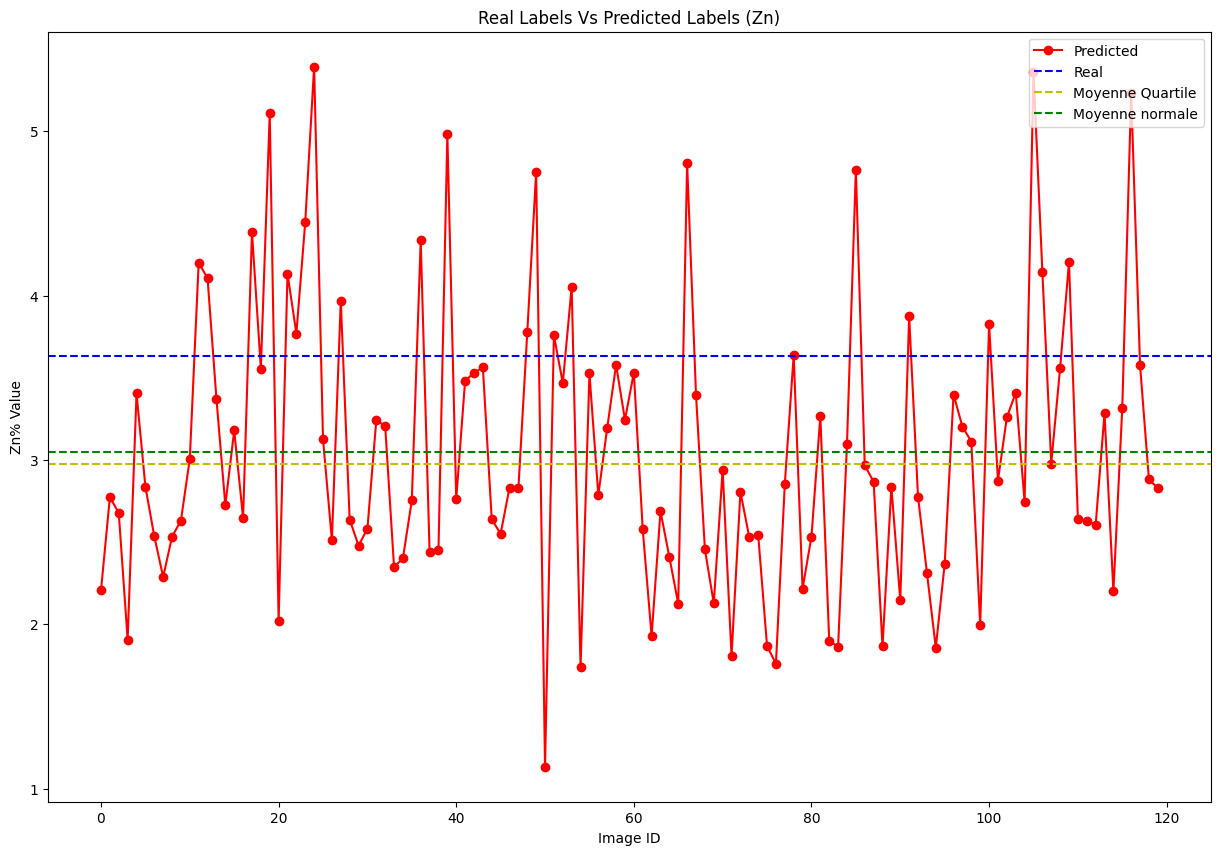

In [80]:
PlotTenneurs(Teneur_predit, TeneurReel, Moyenne , 'Zn')

1/1 [==============================] - 0s 55ms/step
120
1/1 [==============================] - 0s 66ms/step
58
1/1 [==============================] - 0s 71ms/step
120
1/1 [==============================] - 0s 79ms/step
120
1/1 [==============================] - 0s 80ms/step
120
1/1 [==============================] - 0s 78ms/step
120
1/1 [==============================] - 0s 61ms/step
120
1/1 [==============================] - 0s 73ms/step
120
1/1 [==============================] - 0s 58ms/step
120
1/1 [==============================] - 0s 82ms/step
120
1/1 [==============================] - 0s 72ms/step
120
1/1 [==============================] - 0s 87ms/step
120
1/1 [==============================] - 0s 74ms/step
120
1/1 [==============================] - 0s 84ms/step
120
1/1 [==============================] - 0s 69ms/step
120


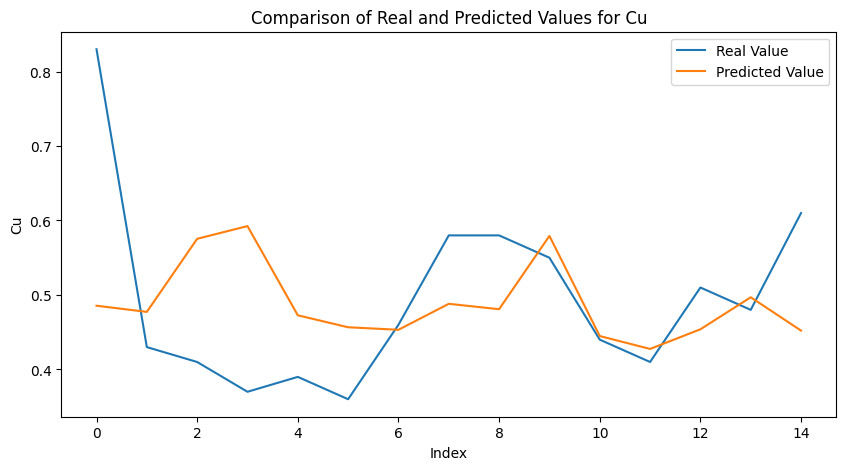

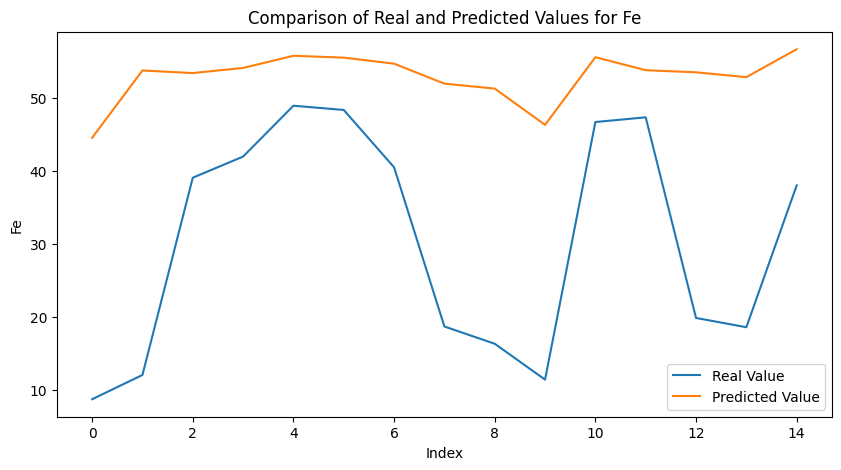

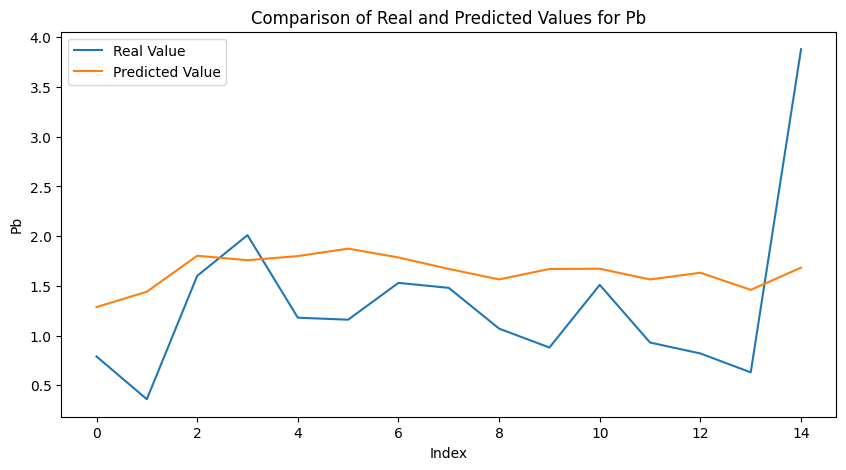

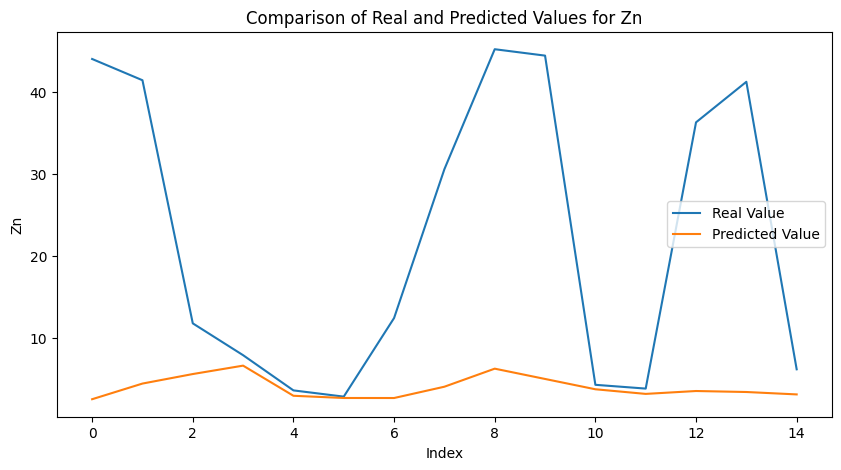

In [46]:
import matplotlib.pyplot as plt

dep_data = pd.read_excel('videoSample.xlsx')
vidTenerReel = []
vidTenerpredit = []

for index , row in dep_data.iterrows():
    if row['type'] == 'Dep' :
        Teneur_predit = deploiement ( 'E:/data/'+row['Name'], Model)
        print(len(Teneur_predit))
        Moyenne = CalculMoyenneTenneursPredites(Teneur_predit)
        TeneurReel=TenneurReel(row['Name'],"videoSample.xlsx")
        vidTenerReel.append(TeneurReel)
        vidTenerpredit.append(Moyenne)

vidTenerReel = np.array(vidTenerReel)
vidTenerpredit = np.array(vidTenerpredit)

# Assuming the format of Moyenne and TeneurReel is (value1, value2, value3, value4)
labels = ["Cu", "Fe", "Pb", "Zn"]

# Plotting
for i in range(4):
    plt.figure(figsize=(10, 5))  # create a new figure with specified size
    plt.plot(vidTenerReel[:, i], label="Real Value")
    plt.plot(vidTenerpredit[:, i], label="Predicted Value")
    plt.title(f"Comparison of Real and Predicted Values for {labels[i]}")
    plt.xlabel("Index")
    plt.ylabel(labels[i])
    plt.legend()
    plt.show()

In [ ]:
vidzn10 = [ ]

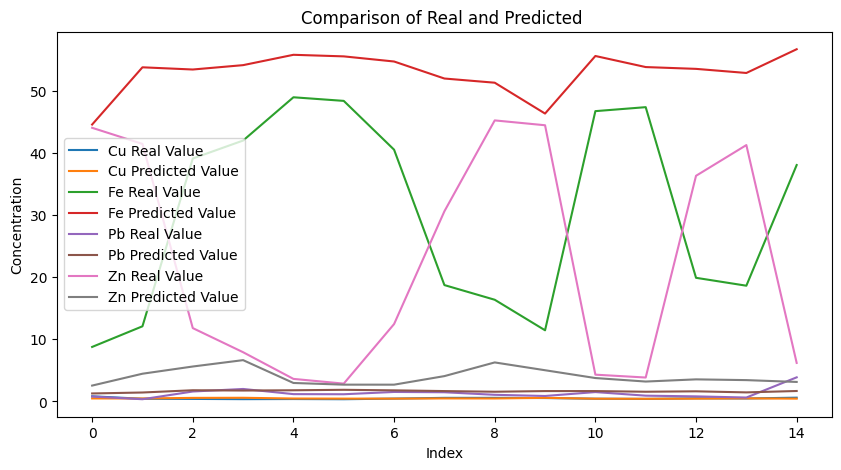

In [56]:
    plt.figure(figsize=(10, 5))  # create a new figure with specified size
    plt.plot(vidTenerReel[:, 0], label="Cu Real Value")
    plt.plot(vidTenerpredit[:, 0], label="Cu Predicted Value")
    plt.plot(vidTenerReel[:, 1], label="Fe Real Value")
    plt.plot(vidTenerpredit[:, 1], label="Fe Predicted Value")
    plt.plot(vidTenerReel[:, 2], label="Pb Real Value")
    plt.plot(vidTenerpredit[:, 2], label="Pb Predicted Value")
    plt.plot(vidTenerReel[:, 3], label="Zn Real Value")
    plt.plot(vidTenerpredit[:, 3], label="Zn Predicted Value")
    plt.title(f"Comparison of Real and Predicted ")
    plt.xlabel("Index")
    plt.ylabel("Concentration")
    plt.legend()
    plt.show()

In [33]:
#calculate RMSE
#sqrt(mean_squared_error(actual, pred))
dep_data[dep_data['type'] == 'Dep']

,Name,type,Resolution,Video duration (S),File format,Compression bitrate (Mbits/S),File Size (MB),Ag (g/t),Cu %,Fe %,...,light source height (cm),Exposure time (um),Frame rate (Hz),Acquisition frame rate (Hz),Sharpness,Blance white,Balance Ratio,PH,Level,Temperature
4,rl4_zn12_6_23.avi,Dep,1200x1200,60,AVI compressed,35,275.294,56.64,0.83,8.77,...,24,20000,49.6,49,0,Off,None,12.88,NaN,25
19,rl3_zn16_6_23-2.avi,Dep,1200x1200,28,AVI compressed,35,133.524,36.12,0.43,12.09,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
26,eb2_zn19_6_23-2.avi,Dep,1200x1200,60,AVI compressed,35,273.316,50.80,0.41,39.08,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
28,eb3_zn19_6_23-2.avi,Dep,1200x1200,60,AVI compressed,35,273.316,53.24,0.37,41.97,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
34,ep1_zn19_6_23-2.avi,Dep,1200x1200,60,AVI compressed,35,NaN,39.08,0.39,48.93,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
36,ep2_zn19_6_23-2.avi,Dep,1200x1200,60,AVI compressed,35,NaN,34.16,0.36,48.35,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
38,rlm1_zn19_6_23-4.avi,Dep,1200x1200,60,AVI compressed,35,NaN,52.72,0.46,40.50,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
44,rl1_zn20_6_23.avi,Dep,1200x1200,60,AVI compressed,35,NaN,43.96,0.58,18.72,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
46,rl3_zn20_6_23.avi,Dep,1200x1200,60,AVI compressed,35,NaN,48.36,0.58,16.36,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25
48,rl4_zn20_6_23-2.avi,Dep,1200x1200,60,AVI compressed,35,NaN,51.76,0.55,11.45,...,24,20000,49.6,49,0,Off,None,NaN,NaN,25


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def error_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)
    
    return mse, mae, rmse, mape, r2


In [66]:
def calculate_errors(real_values, predicted_values):
    elements = ['Cu', 'Fe', 'Pb', 'Zn']
    error_table = {element: [] for element in elements}

    for i in range(4):
        real = [value[i] for value in real_values]
        pred = [value[i] for value in predicted_values]
        mse, mae, rmse, mape, r2  = error_metrics(real, pred)
        error_table[elements[i]].extend([mse, mae, rmse, mape, r2 ])

    return error_table


In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def error_metrics(true, pred):
    true, pred = np.array(true), np.array(pred)
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)
    
    return mse, mae, rmse, mape, r2

def calculate_errors(real_values, predicted_values):
    elements = ['Cu', 'Fe', 'Pb', 'Zn']
    error_table = {element: [] for element in elements}

    for i, element in enumerate(elements):
        real = [value[i] for value in real_values]
        pred = [value[i] for value in predicted_values]
        mse, mae, rmse, mape, r2 = error_metrics(real, pred)
        error_table[element].extend([mse, mae, rmse, mape, r2])

    return error_table

error_table = calculate_errors(vidTenerReel, vidTenerpredit)
df = pd.DataFrame(error_table, index=['MSE', 'MAE', 'RMSE', 'MAPE', 'R2 Score'])
print(df)


                 Cu          Fe         Pb          Zn
MSE        0.017452  664.867057   0.665909  633.629087
MAE        0.095950   22.456041   0.648892   18.407179
RMSE       0.132105   25.785016   0.816032   25.171990
MAPE      19.101509  134.105343  68.966296   58.408754
R2 Score  -0.239707   -1.992563  -0.040934   -1.093965
